<a href="https://colab.research.google.com/github/pedrosoriaa1a/World_Happiness_Report_2024/blob/main/World_Happiness_Report_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report 2024

**Conjunto de datos obtenido de Kaggle:** https://www.kaggle.com/datasets/abdullah0a/world-happiness-data-2024-explore-life

Este conjunto de datos contiene métricas detalladas sobre indicadores de bienestar y felicidad, derivados del Informe Mundial sobre la Felicidad 2024. Abarca varios años e incluye varias dimensiones de la felicidad y la calidad de vida. El conjunto de datos está estructurado de la siguiente manera:

Características:

* Nombre del país : el país para el cual se informan los datos.
* Año : El año en el que se recopilaron los datos.
* Escalera de vida : Una medida de bienestar subjetivo o satisfacción con la vida en una escala donde los valores más altos generalmente indican mayor felicidad.
* Logaritmo del PIB per cápita : El logaritmo del PIB per cápita, que refleja la prosperidad económica y su impacto en la felicidad.
* Apoyo social : Una métrica que indica el nivel de apoyo social percibido o red disponible para las personas.
* Esperanza de vida saludable al nacer : Número de años que se espera que una persona viva con buena salud desde su nacimiento.
* Libertad para tomar decisiones de vida : una medida de cuán libres se sienten los individuos al tomar decisiones de vida.
* Generosidad : Una métrica que refleja el nivel de generosidad o donaciones caritativas en un país.
* Percepciones de corrupción : Una medida de cuán corrupto se percibe que es el gobierno, influyendo en la confianza y la satisfacción.
* Afecto positivo : El nivel de emociones positivas como alegría y satisfacción que experimentan los individuos.
* Afecto negativo : El nivel de emociones negativas como la tristeza y la ansiedad que experimentan los individuos.

Uso:
Este conjunto de datos es útil para analizar las relaciones entre diversos factores y la felicidad general, explorar los cambios temporales y comparar las métricas de bienestar en diferentes países y años. Es compatible con una variedad de análisis, desde el examen de tendencias y patrones en la satisfacción con la vida hasta la evaluación del impacto de los factores económicos y sociales en el bienestar.

## Librerías a usar

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Entendiendo los datos

In [3]:
happy_data = pd.read_csv('/content/drive/MyDrive/data/World_Happiness_Report_2024.csv')
happy_data.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.350416        0.450662   
1  Afghanistan  2009     4.401778            7.508646        0.552308   
2  Afghanistan  2010     4.758381            7.613900        0.539075   
3  Afghanistan  2011     3.831719            7.581259        0.521104   
4  Afghanistan  2012     3.782938            7.660506        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.500000                      0.718114    0.164055   
1                         50.799999                      0.678896    0.187297   
2                         51.099998                      0.600127    0.117861   
3                         51.400002                      0.495901    0.160098   
4                         51.700001                      0.530935    0.234157   

   Perceptions of corruption  Positive affect  Negative affect  
0                   0.881686         0.414297         0.258195  
1                   0.850035         0.481421         0.237092  
2                   0.706766         0.516907         0.275324  
3                   0.731109         0.479835         0.267175  
4                   0.775620         0.613513         0.267919

### Sanity Check

#### Tipos dentro del dataset

In [4]:
happy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [5]:
happy_data.shape

(2363, 11)

#### Valores Nulos & NA

In [6]:
happy_data.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [7]:
happy_data.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

### EDA

In [8]:
happy_data.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  2363.000000  2363.000000         2335.000000     2350.000000   
mean   2014.763860     5.483562            9.399673        0.809369   
std       5.059436     1.125523            1.152062        0.121211   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2011.000000     4.646750            8.506165        0.743811   
50%    2015.000000     5.448725            9.502946        0.834395   
75%    2019.000000     6.323592           10.392974        0.903779   
max    2023.000000     8.018934           11.675588        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2300.000000                   2327.000000   
mean                          63.401828                      0.750290   
std                            6.842644                      0.139366   
min                            6.720000                      0.228301   
25%                           59.195001                      0.660706   
50%                           65.099998                      0.771122   
75%                           68.552502                      0.861740   
max                           74.599998                      0.985178   

        Generosity  Perceptions of corruption  Positive affect  \
count  2282.000000                2238.000000      2339.000000   
mean      0.000096                   0.743959         0.651878   
std       0.161386                   0.184871         0.106249   
min      -0.339547                   0.035198         0.178886   
25%      -0.111940                   0.686784         0.571977   
50%      -0.021613                   0.798497         0.663420   
75%       0.093569                   0.867557         0.737262   
max       0.699570                   0.983276         0.883586   

       Negative affect  
count      2347.000000  
mean          0.273160  
std           0.087133  
min           0.082737  
25%           0.208559  
50%           0.262175  
75%           0.326211  
max           0.704590

#### Gráficos

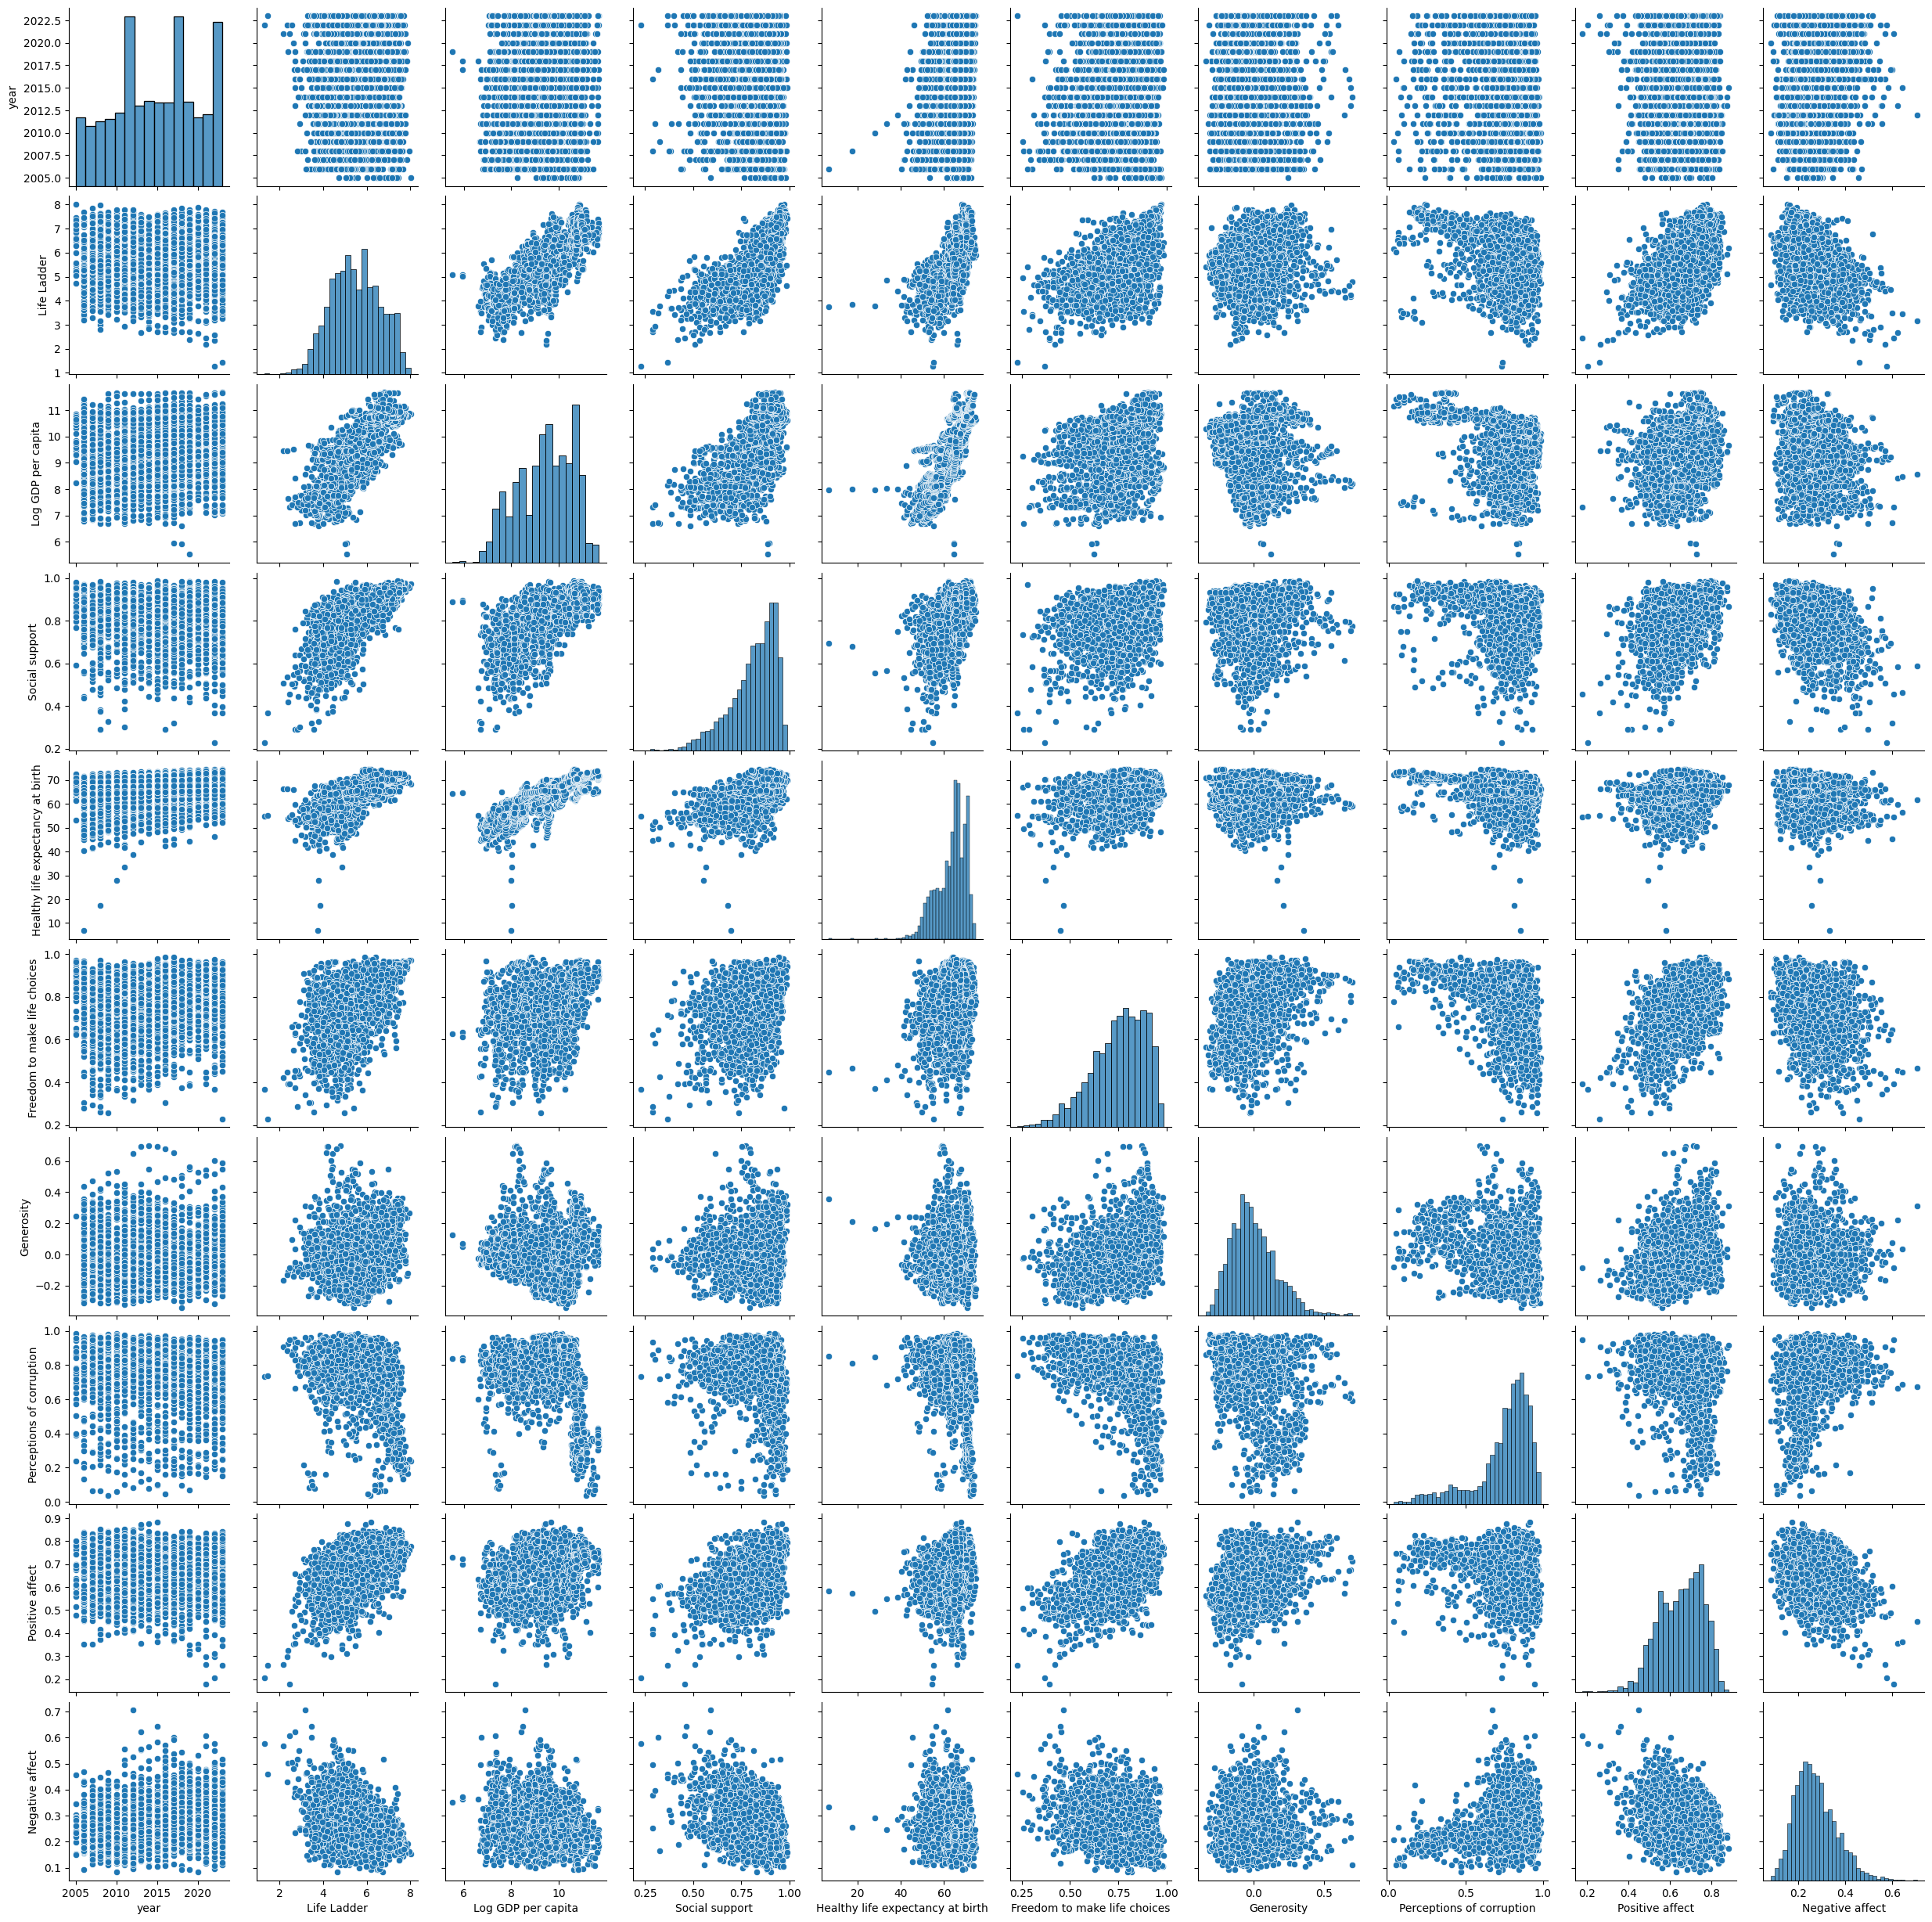

In [9]:
sns.pairplot(happy_data)

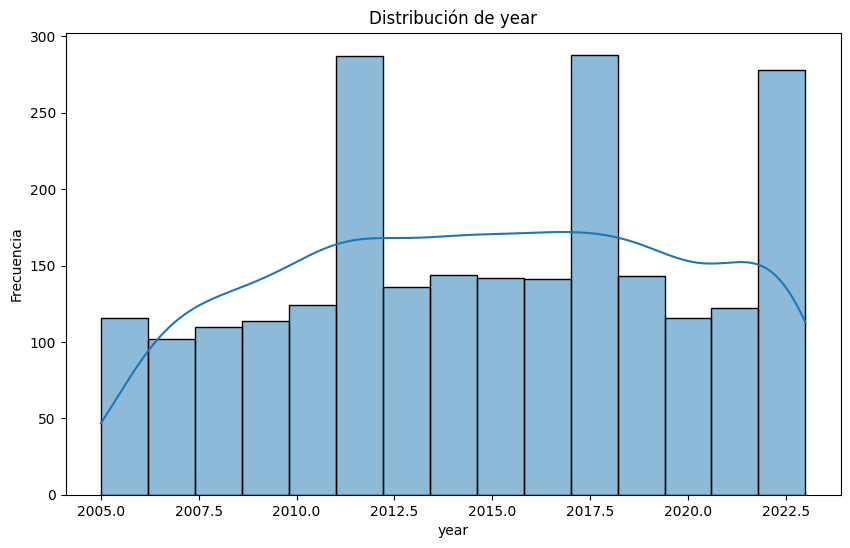

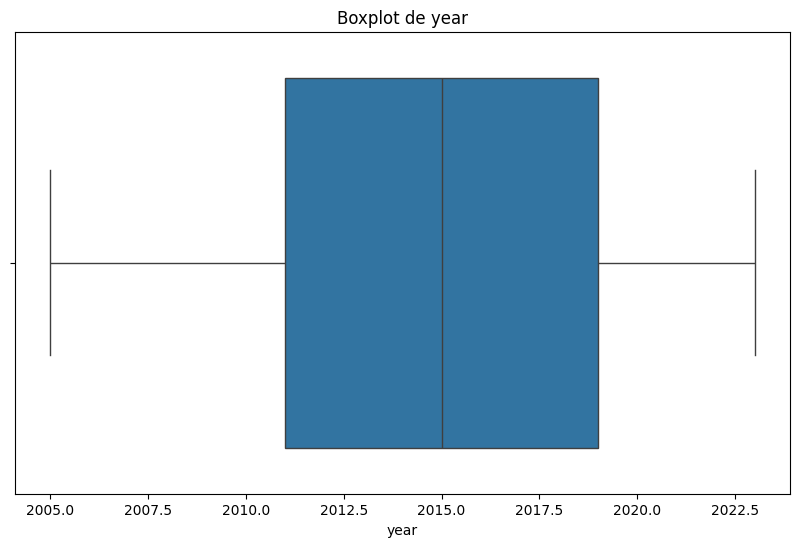

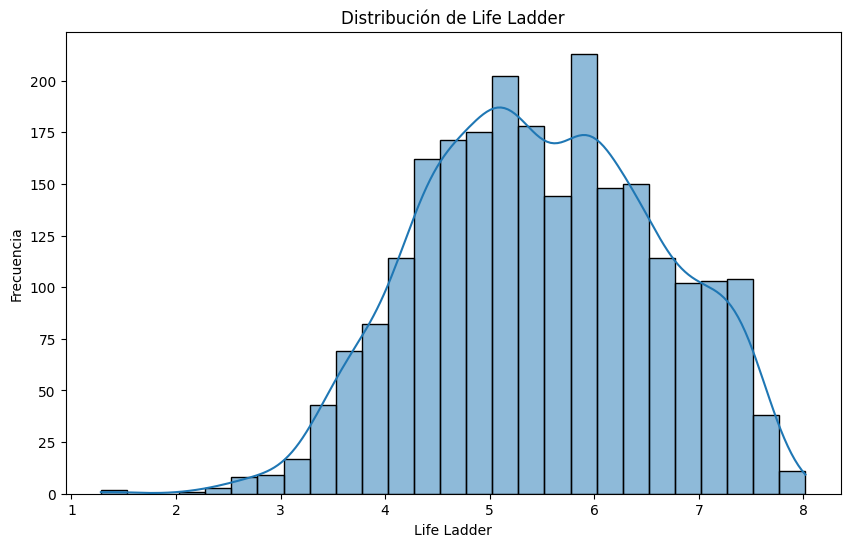

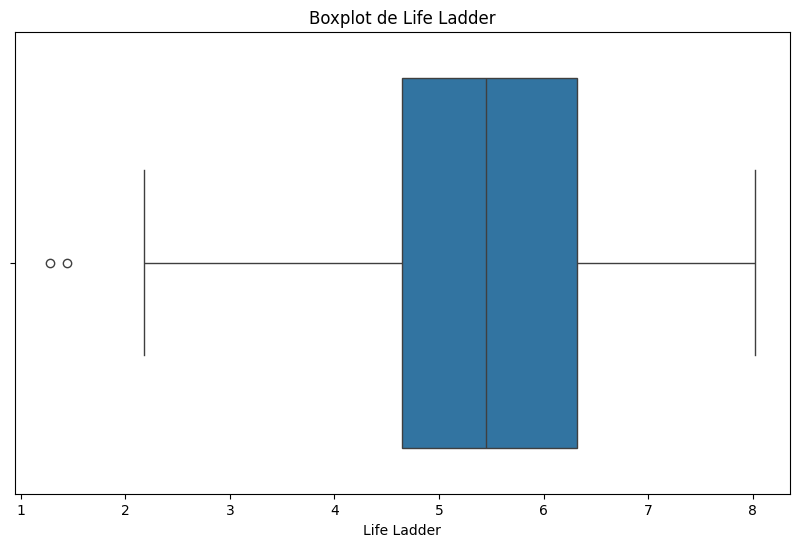

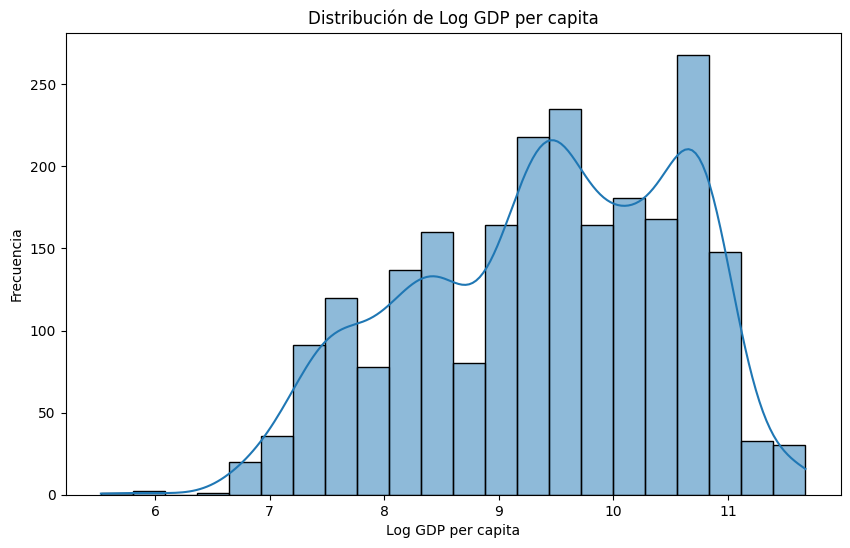

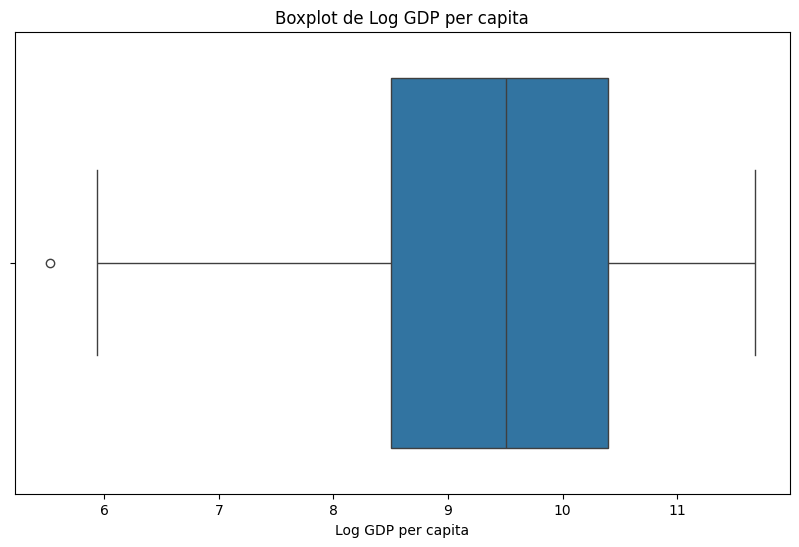

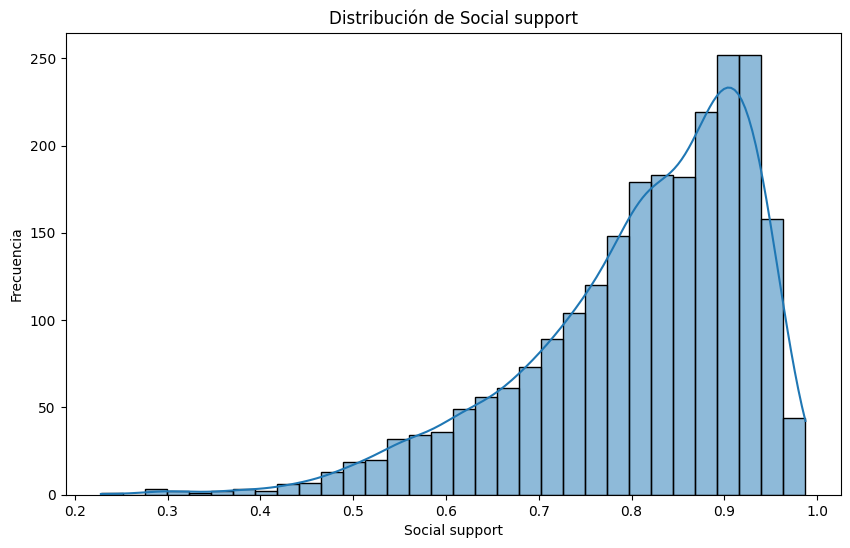

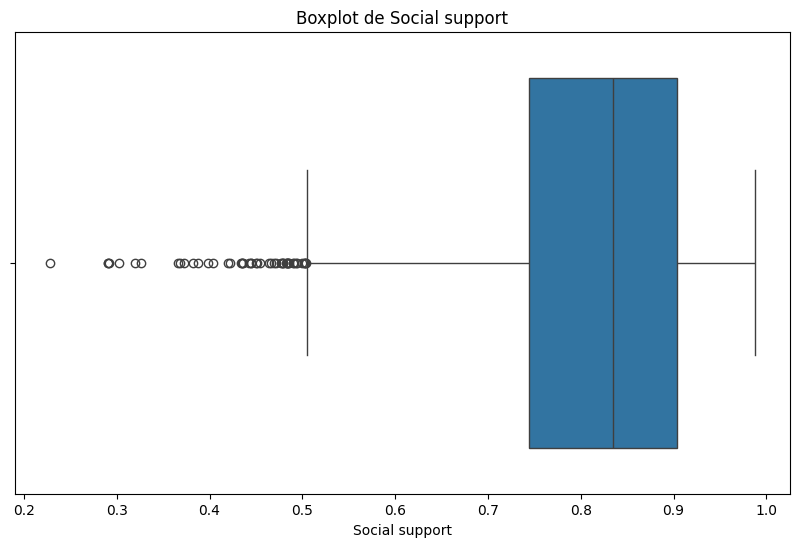

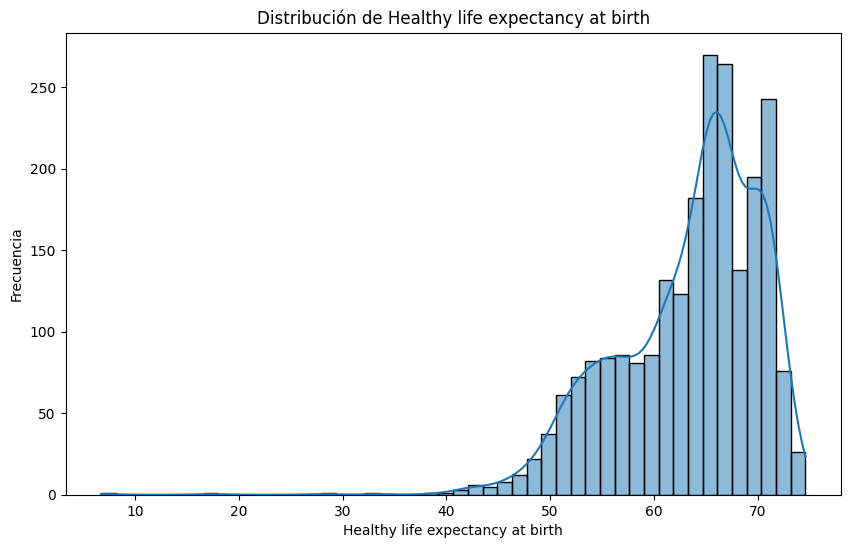

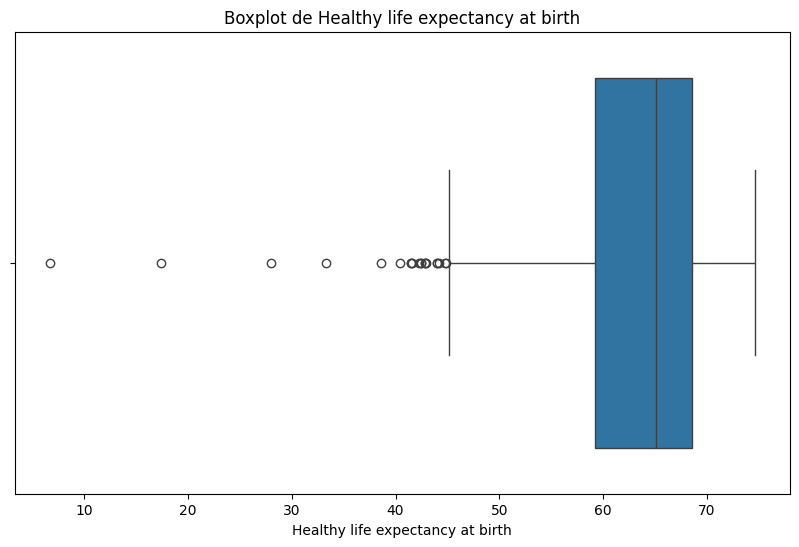

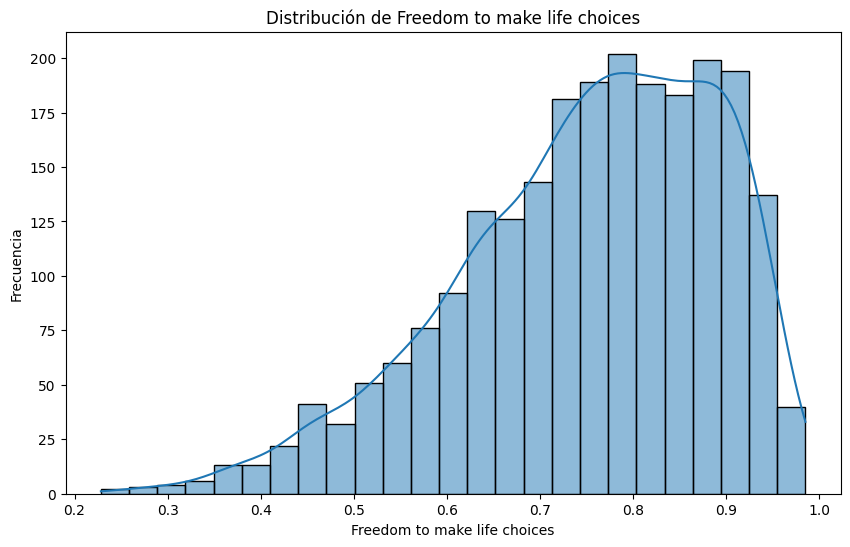

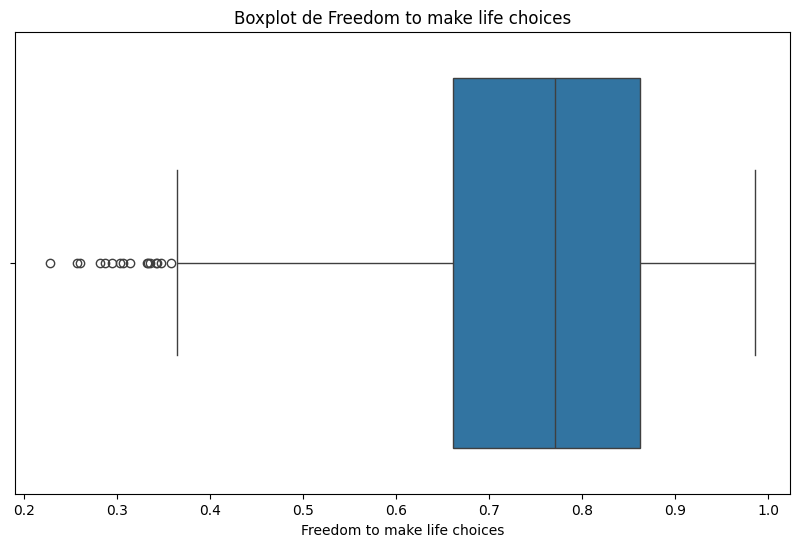

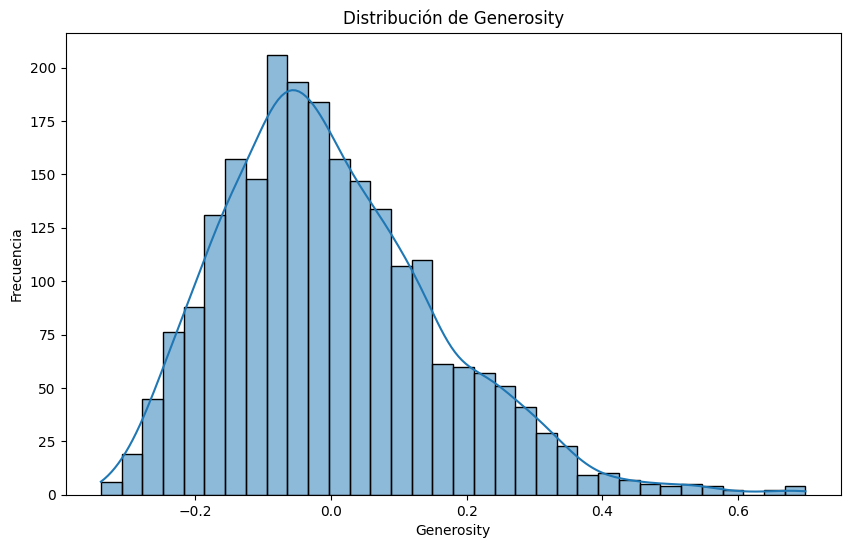

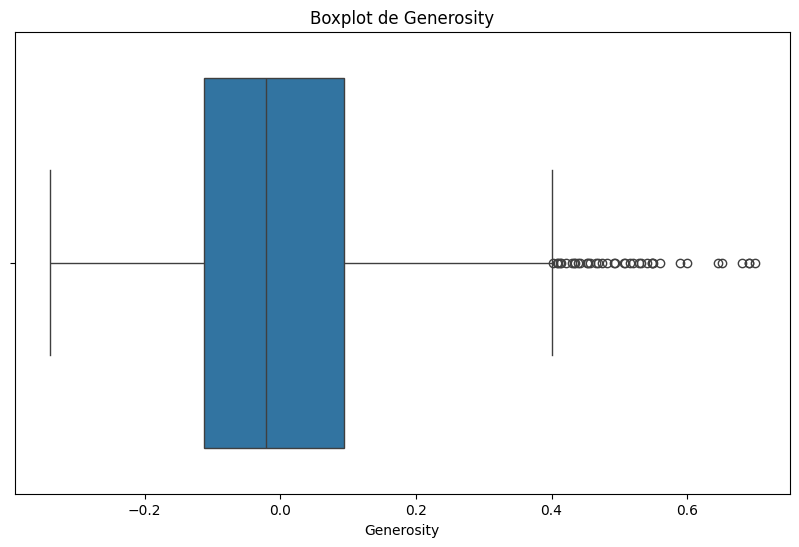

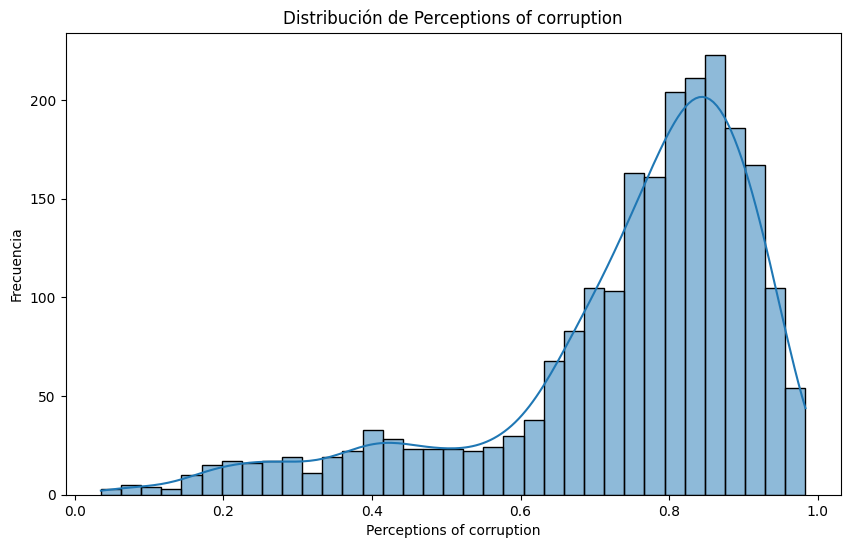

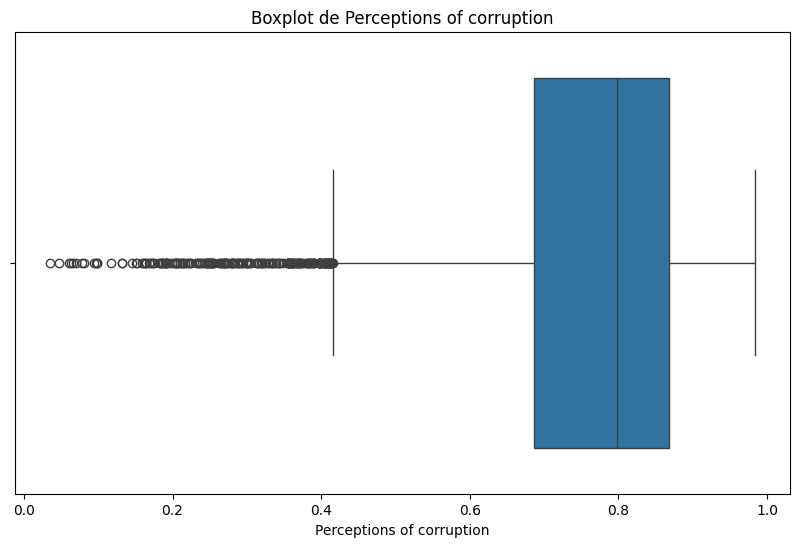

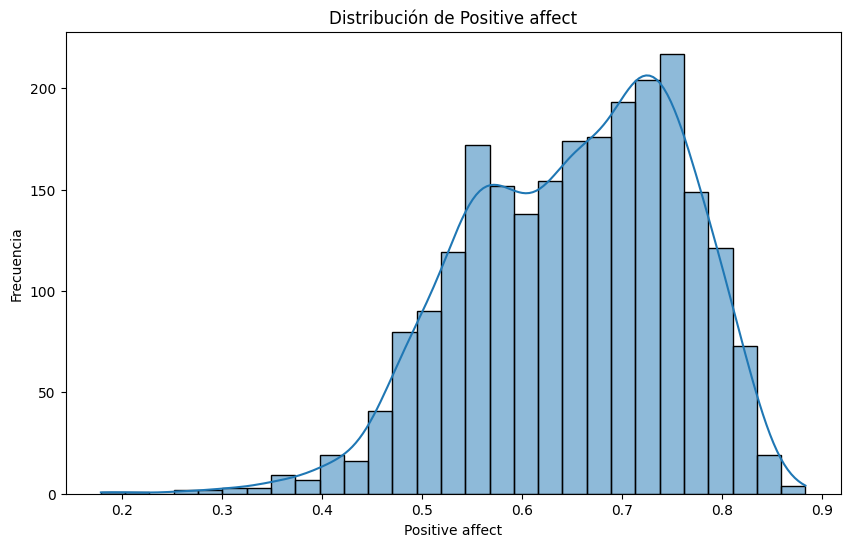

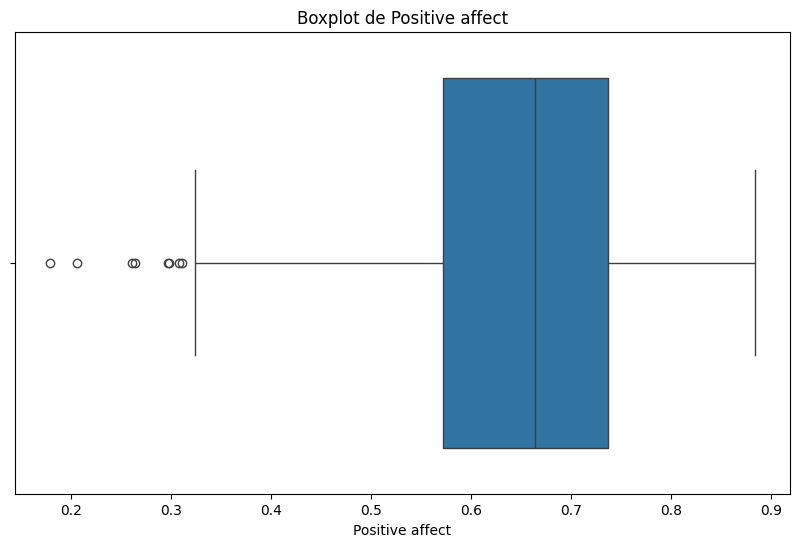

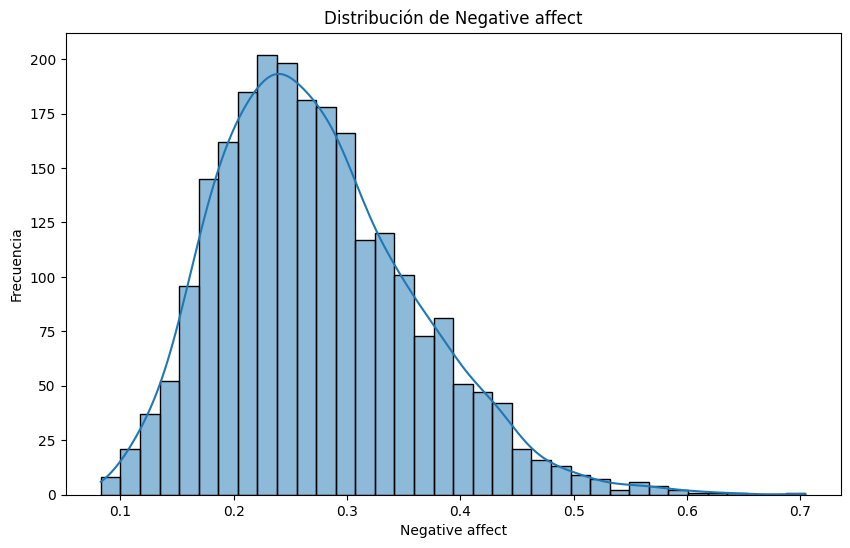

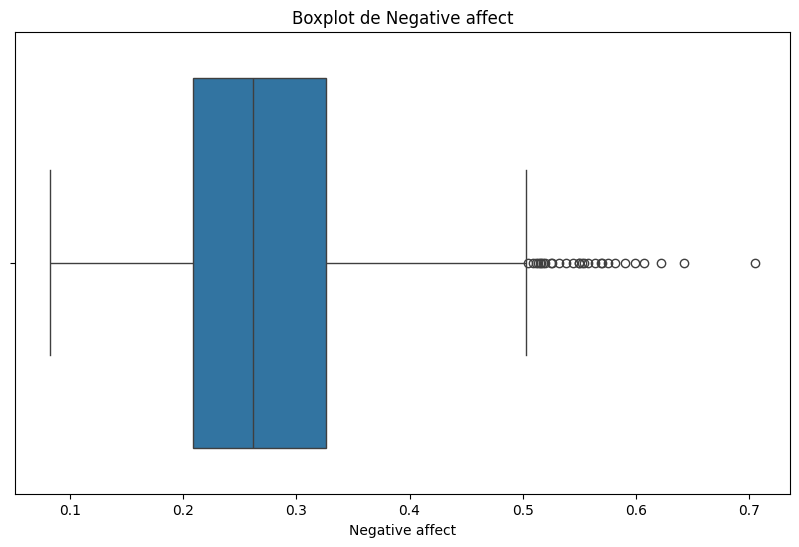

In [10]:
variables_continuas_lista = ['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
def plots_var_comtinuas(df, variables):
  for variable in variables:
    # Histograma para ver la distribución
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=variable, kde=True)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

    # Boxplot para identificar outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[variable])
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)
    plt.show()

plots_var_comtinuas(happy_data, variables_continuas_lista)


#### Tratamiento de valores NA

In [46]:
def reemplaza_NA(df, columna):
    df[columna].fillna(0, inplace=True)
    return df

In [47]:
variables_NA_lista = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
for variable in variables_NA_lista:
    happy_data = reemplaza_NA(happy_data, variable)


In [48]:
happy_data.isna().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

#### Matriz de correlación

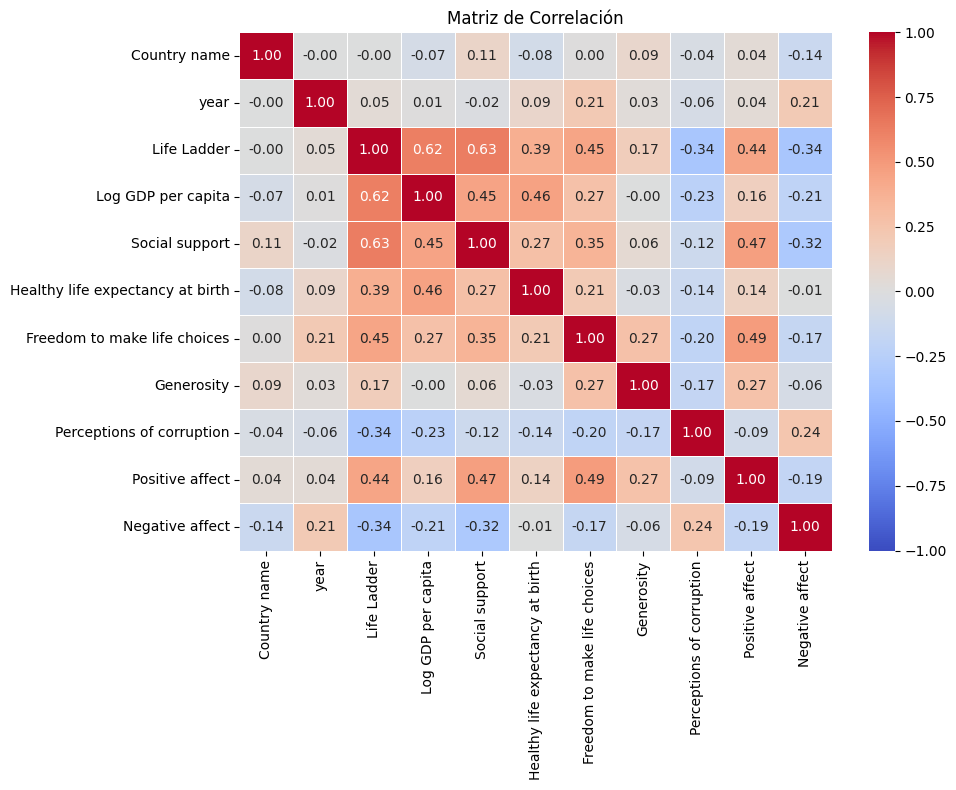

In [49]:
# Convirtiendo
correlation_data = happy_data.copy()
correlation_data['Country name'] = happy_data['Country name'].astype('category').cat.codes

corr_matrix = correlation_data.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

#### Hipótesis



1. Relación entre PIB per cápita y felicidad:

Hipótesis: A mayor PIB per cápita, mayor será el nivel de felicidad reportado por los habitantes de un país.




In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Separando las variables
X = happy_data['Log GDP per capita'].values.reshape(-1, 1)
y = happy_data['Life Ladder']

# Resumen estadístico
X = sm.add_constant(X)
model_sm = sm.OLS(y, X).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     1468.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):          2.95e-250
Time:                        18:38:20   Log-Likelihood:                -3060.5
No. Observations:                2363   AIC:                             6125.
Df Residuals:                    2361   BIC:                             6136.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2574      0.112     11.250      0.0

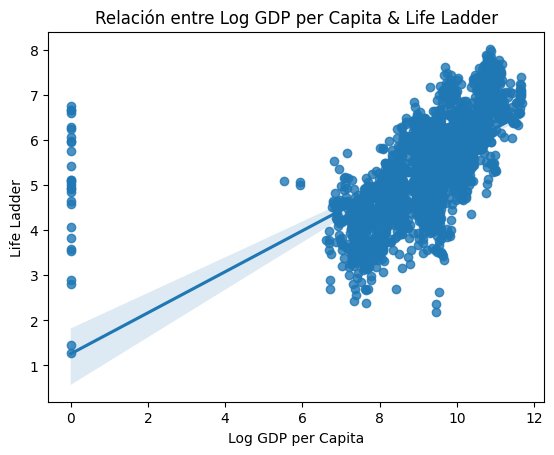

In [51]:
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=happy_data)

plt.title('Relación entre Log GDP per Capita & Life Ladder')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Ladder')
plt.show()

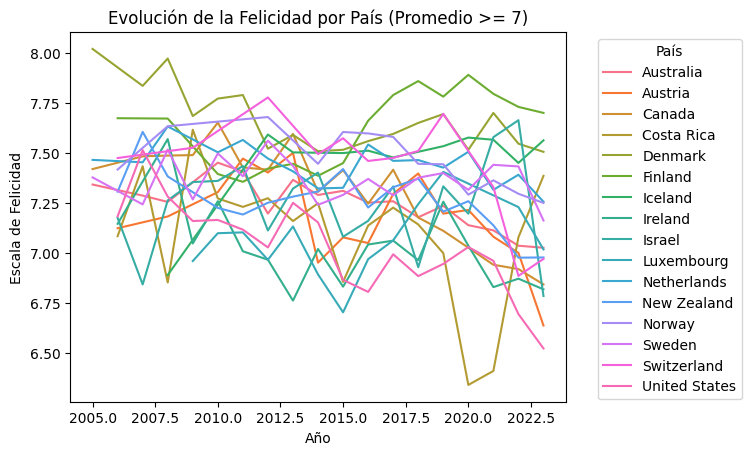

In [52]:
data_plot = happy_data[happy_data.groupby('Country name')['Life Ladder'].transform('mean') >= 7]

# Crear el gráfico de líneas
sns.lineplot(x='year', y='Life Ladder', hue='Country name', data=data_plot)

# Personalizar el gráfico
plt.title('Evolución de la Felicidad por País (Promedio >= 7)')
plt.xlabel('Año')
plt.ylabel('Escala de Felicidad')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

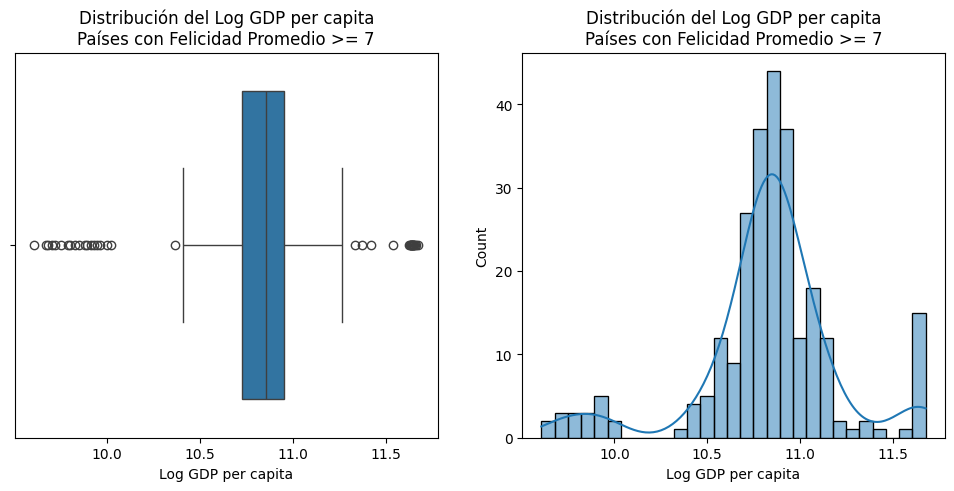

In [53]:
# Crear un subplot con un boxplot y un histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(x='Log GDP per capita', data=data_plot, ax=ax1)
ax1.set_title('Distribución del Log GDP per capita\nPaíses con Felicidad Promedio >= 7')

# Histograma
sns.histplot(data=data_plot, x='Log GDP per capita', kde=True, ax=ax2)
ax2.set_title('Distribución del Log GDP per capita\nPaíses con Felicidad Promedio >= 7')

plt.show()

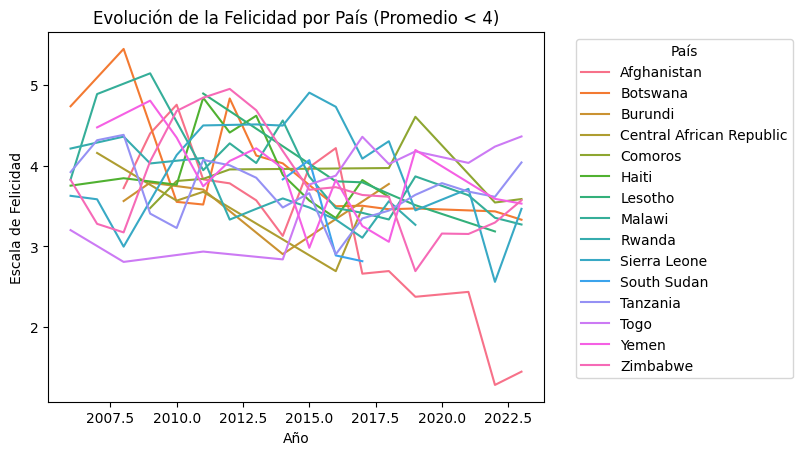

In [54]:
data_plot = happy_data[happy_data.groupby('Country name')['Life Ladder'].transform('mean') < 4]

# Crear el gráfico de líneas
sns.lineplot(x='year', y='Life Ladder', hue='Country name', data=data_plot)

# Personalizar el gráfico
plt.title('Evolución de la Felicidad por País (Promedio < 4)')
plt.xlabel('Año')
plt.ylabel('Escala de Felicidad')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

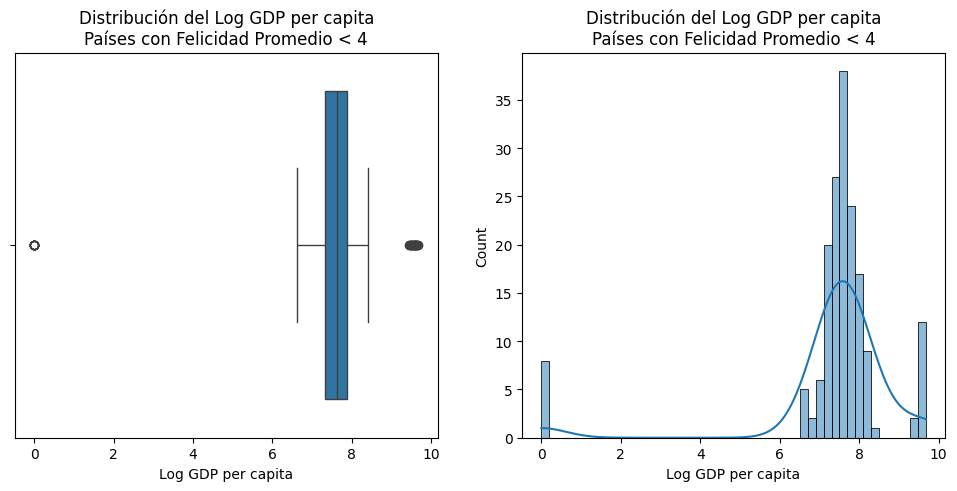

In [55]:
# Crear un subplot con un boxplot y un histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(x='Log GDP per capita', data=data_plot, ax=ax1)
ax1.set_title('Distribución del Log GDP per capita\nPaíses con Felicidad Promedio < 4')

# Histograma
sns.histplot(data=data_plot, x='Log GDP per capita', kde=True, ax=ax2)
ax2.set_title('Distribución del Log GDP per capita\nPaíses con Felicidad Promedio < 4')

plt.show()

**Conclusión**
* Relación positiva: Confirmamos que existe una relación positiva entre el nivel de desarrollo económico (medido por el PIB per cápita) y la felicidad.

* Rendimientos decrecientes: La elasticidad del ingreso sugiere que a medida que un país se vuelve más rico, los aumentos adicionales en el ingreso generan incrementos cada vez más pequeños en la felicidad.


Además se puede observar en los gráficos que países que tienen un nivel más alto de felicidad tienden a tener un nivel más alto en PIB percapita vs los países con niveles de felicidad más bajos

2. Impacto del apoyo social en la felicidad:

Hipótesis: Un mayor nivel de apoyo social se asociará con niveles más altos de felicidad.

* Hipótesis nula (H0): No existe una relación lineal positiva entre el nivel de apoyo social y la escala de vida.

* Hipótesis alternativa (H1): Existe una relación lineal positiva entre el nivel de apoyo social y la escala de vida.

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separando las variables
X = happy_data['Social support'].values.reshape(-1, 1)
y = happy_data['Life Ladder']

# Train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1998)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Haciendo predicciones
y_pred = model.predict(X_test)

# Resumen estadístico del modelo (Statsmodels)
X = sm.add_constant(X)
model_sm = sm.OLS(y, X).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1541.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):          7.43e-260
Time:                        17:21:01   Log-Likelihood:                -3038.3
No. Observations:                2363   AIC:                             6081.
Df Residuals:                    2361   BIC:                             6092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2632      0.109     11.588      0.0

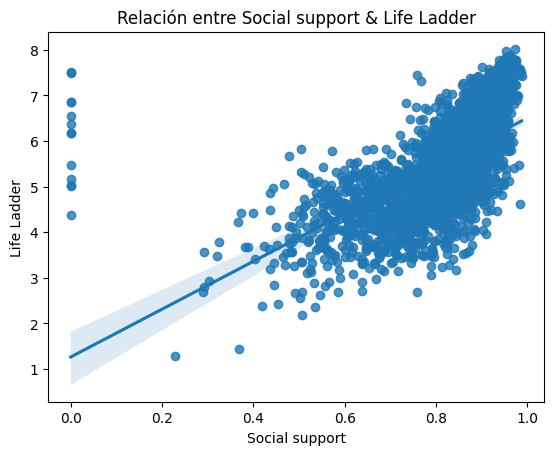

In [33]:
sns.regplot(x='Social support', y='Life Ladder', data=happy_data)

# Add labels and title
plt.title('Relación entre Social support & Life Ladder')
plt.xlabel('Social support')
plt.ylabel('Life Ladder')
plt.show()

**Conclusión:**

* R-cuadrado: El 39.5% de la variabilidad en la "Escala de Vida" puede ser explicada por las variaciones en el "Apoyo Social". Esto indica que el apoyo social es un predictor moderadamente bueno de la felicidad, pero hay otros factores que no están siendo considerados en este modelo que también influyen en los niveles de felicidad.

* Coeficiente de "Apoyo Social": Un aumento de una unidad en el "Apoyo Social" se asocia con un aumento de 5.2432 unidades en la "Escala de Vida". Esto sugiere que el apoyo social tiene un impacto bastante fuerte en la felicidad.

* Significancia estadística: El valor de p asociado al coeficiente de "Apoyo Social" es extremadamente bajo (casi cero). Esto significa que es muy poco probable que el resultado observado se deba al azar. Podemos concluir con confianza que existe una relación real entre el apoyo social y la felicidad.

El valor p asociado al coeficiente de "Apoyo Social" es extremadamente bajo (casi cero). Esto nos lleva a rechazar la hipótesis nula. Al rechazar H₀, estamos aceptando la hipótesis alternativa, que sugiere que SÍ existe una relación lineal positiva entre el "Apoyo Social" y la "Escala de Vida".

## Aplicando ML - Regresión Lineal

### Selección de variable objetivo

**Variable Objetivo:** Life Ladder

Se eligió *Life Ladder* como variable a predecir debido a su capacidad para medir directamente la percepción subjetiva de bienestar de las personas. Al ser una medida ampliamente utilizada y comparable a nivel internacional, nos permite analizar qué factores influyen en la felicidad de manera individual y a gran escala. Además, al centrarnos en la perspectiva de las personas, obtenemos una visión más rica y completa del bienestar que la que nos proporcionarían indicadores objetivos.









### Definiendo características

In [56]:
# Características y V.O.
X = happy_data.drop(['Country name', 'year', 'Life Ladder'], axis=1)
y = happy_data['Life Ladder']

### Dividir dataset

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1998)

### Estandarización de los datos

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Aplicando modelo de regresión

In [69]:
# Crear modelo
linear_model = LinearRegression()

# Entrenar modelo
linear_model.fit(X_train_scaled, y_train)

# Prediccióm en conjunto de train
y_train_pred = linear_model.predict(X_train_scaled)

# Predicción en el conjunto de test
ypred = linear_model.predict(X_test_scaled)

# Error en train
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
print(f'Error MSE train: {train_mse}')
print(f'Error MAE train: {train_mae}')

# Error en test
test_mse = mean_squared_error(y_test, ypred)
test_mae = mean_absolute_error(y_test, ypred)
print(f'Error MSE test: {test_mse}')
print(f'Error MAE test: {test_mae}')

Error MSE train: 0.45756353110300313
Error MAE train: 0.5032155226685399
Error MSE test: 0.49891093359569144
Error MAE test: 0.5057062411066909


### k-Fold

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
lin_rmse_scores = np.sqrt(-scores)
for i, err in enumerate(lin_rmse_scores):
    print("Error k-Fold %d: %.3f" % (i + 1, err))

print("Media: %.3f" % lin_rmse_scores.mean())
print("Devsiación estándar: %.3f" % lin_rmse_scores.std())
#

Error k-Fold 1: 0.699
Error k-Fold 2: 0.663
Error k-Fold 3: 0.724
Error k-Fold 4: 0.631
Error k-Fold 5: 0.687
Media: 0.681
Devsiación estándar: 0.032


### Evaluación del modelo

In [79]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': linear_model.coef_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nImportancia de características dentro de la Regresión Lineal:")
print(feature_importance)


Importancia de características dentro de la Regresión Lineal:
                            feature  importance
0                Log GDP per capita    0.381790
1                    Social support    0.366845
6                   Positive affect    0.144811
3      Freedom to make life choices    0.113178
2  Healthy life expectancy at birth    0.109713
4                        Generosity    0.078078
7                   Negative affect   -0.086782
5         Perceptions of corruption   -0.172854


In [72]:
# Score en
lm_score_train = linear_model.score(X_train_scaled, y_train)
lm_score_train


0.6483877165476749

In [73]:
# Score en Test
lm_score_test = linear_model.score(X_test_scaled, y_test)
lm_score_test

0.5568876199201394

* El 55.69% de la variabilidad en la variable objetivo ("Life Ladder") en el conjunto de prueba puede ser explicada el modelo.

* Un R² de 0.55 sugiere un ajuste moderado del modelo a los datos. Esto significa el modelo captura una parte importante de la relación entre las variables independientes y la variable dependiente, pero aún hay una porción considerable de la variabilidad que no está siendo explicada.

### Ajuste de modelo

In [82]:
# Crear un modelo de regresión
model = LinearRegression()

# Definir los hiperparámetros a ajustar
param_grid = {'fit_intercept': [True, False]}

# Crear un objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Ajustar el modelo
grid.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros
print(grid.best_params_)

# Evaluar el modelo con los mejores parámetros
best_model = grid.best_estimator_
y_pred_test = best_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f'Error MSE test (modelo mejorado): {test_mse}')
print(f'Error MAE test (modelo mejorado): {test_mae}')

{'fit_intercept': True}
Error MSE test (modelo mejorado): 0.49891093359569144
Error MAE test (modelo mejorado): 0.5057062411066909


In [83]:
lm_score_test = best_model.score(X_test_scaled, y_test)
lm_score_test

0.5568876199201394

Al no encontrar mejora en el modelo se podría explorar otro tipo de modelos para buscar un mejor rendimiento a pesar que el rendimiento del modelo actual no sea considerablemente malo.

## Aplicando K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

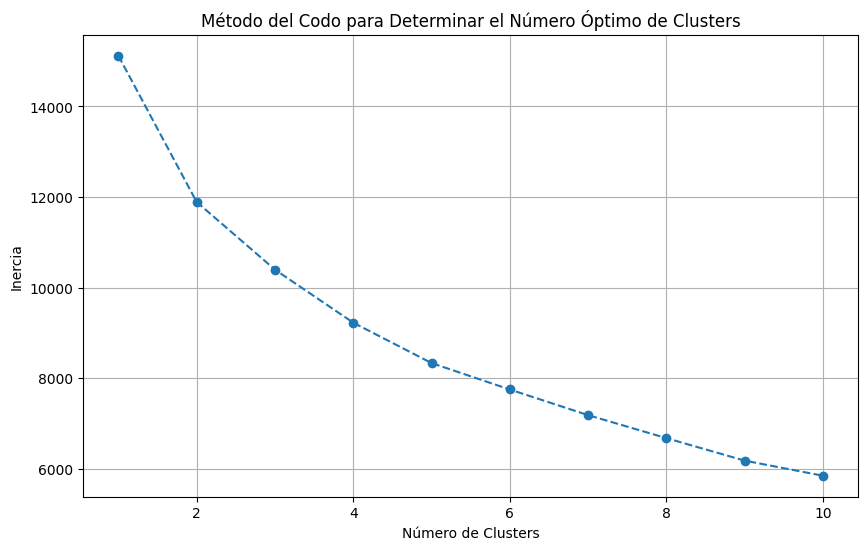

In [85]:
# Determinar el número óptimo de clusters utilizando el método del codo
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 1998)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


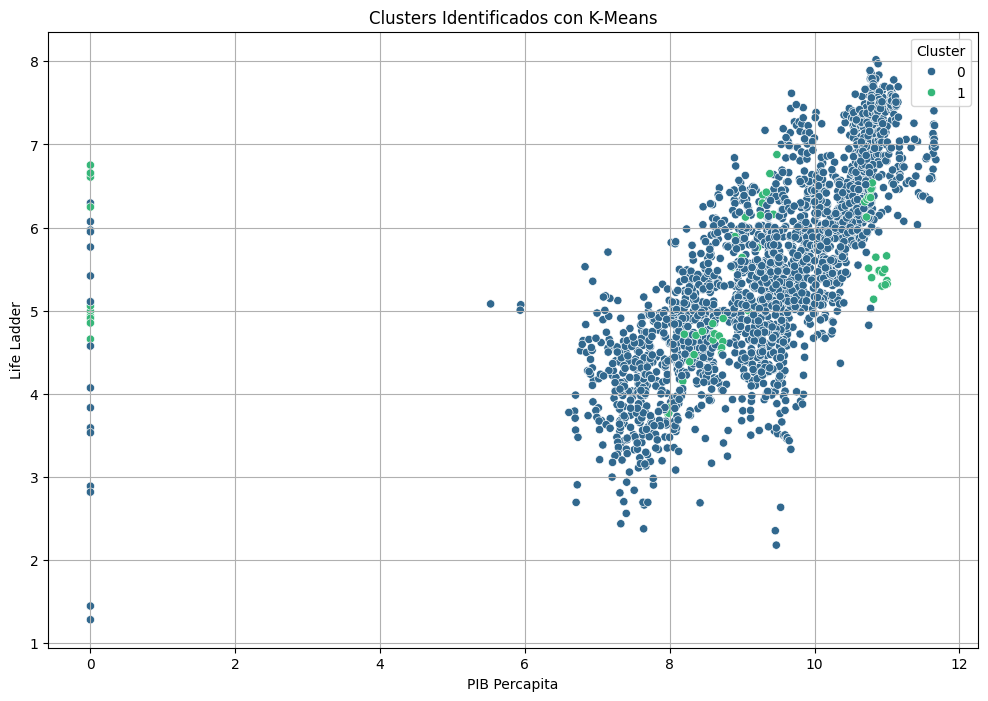

In [91]:
# Aplicando K-Means con el número óptimo de clusters
optimal_clusters = 2
kmeans = KMeans(n_clusters = optimal_clusters, random_state = 1998)
happy_data['Cluster'] = kmeans.fit_predict(X)

# Visualizar los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=happy_data, x='Log GDP per capita', y='Life Ladder', hue='Cluster', palette='viridis', marker='o')
plt.xlabel('PIB Percapita')
plt.ylabel('Life Ladder')
plt.title('Clusters Identificados con K-Means')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()